# Multiclass Classification

## The task
Use a Machine Learning algorithm to help us classify the penguins based on their characteristics.

## Load the data 

In [2]:
import seaborn as sns
import pandas as pd

# Load the penguin dataset
penguin_df = sns.load_dataset('penguins')
penguin_df.dropna(inplace=True)
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


❓What are the characteristics of the penguins

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png' width=700>

❓How many species of penguin are there in this dataset?

In [3]:
penguin_df['species'].nunique()

3

❓How many observations for each species are there in the dataset?

In [4]:
penguin_df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

## Data visualization

Plot the `'bill_length_mm'` against the `'bill_depth_mm'` with a different color for each species:

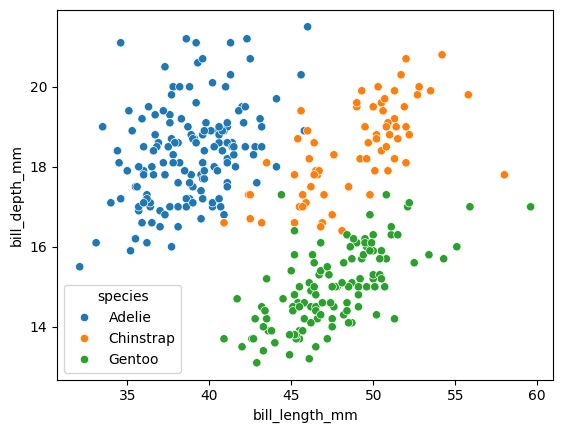

In [5]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguin_df, hue='species');

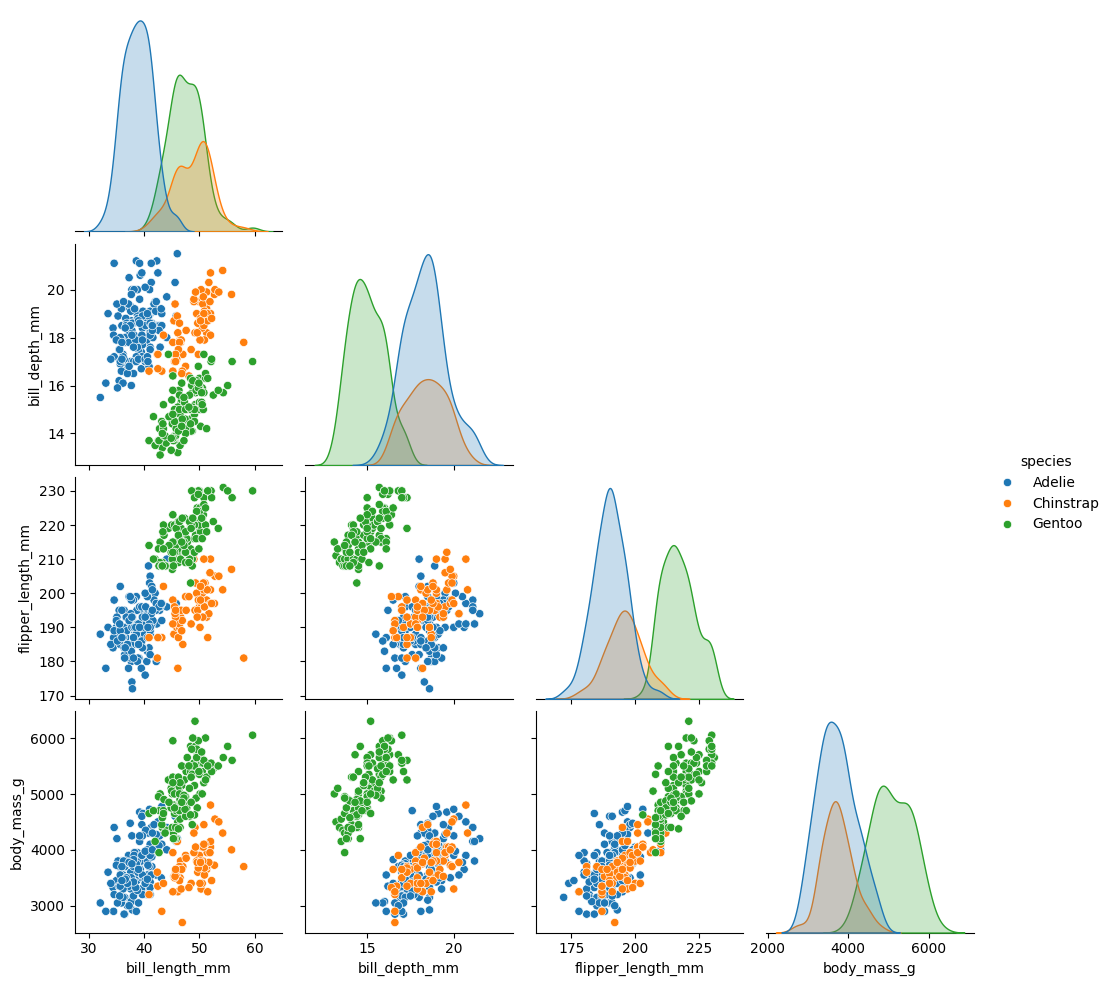

In [6]:
sns.pairplot(penguin_df, hue="species", corner = True);

The **gentoo** species seems to have clearly longer flippers than the other 2 species.

## Modeling

There are two strategies to tackle the multiclass problem:

- One vs One
- One vs All (One vs Rest)

### One vs One
- Train **a model for each pair of classes** within the dataset
- At prediction time, the class which received the most votes is selected

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 

👍 Considers pair-specific differences

👎 Creates a large number of sub models. Computationally expensive

### One vs Rest (One vs All)

- Train **one model per class** against all others combined
- At prediction time, the class with the highest probability is selected

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍 Less computationally expensive

👎 Loses pair-specific differences that get diluted in a combination of classes

👎 It requires one model to be created for each class. For example, three classes requires three models. This could be an issue for large datasets (e.g. millions of rows), slow models (e.g. neural networks), or very large numbers of classes (e.g. hundreds of classes).

## One Vs Rest
Evaluate a model that predicts the penguin species according to its numerical features. Implement a One vs Rest multiclass strategy by tweaking the right parameter of LogisticRegression. Evaluate it by cross-validation and record the time it takes to do so.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier

X = penguin_df.drop(columns = ["species", "island", "sex"])
y = penguin_df['species']

ovr_log_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
# cross_validate should use a cv = KFold() with shuffling since it doesn't shuffle by default!
ovr_cv_results = cross_validate(ovr_log_model, X, y, cv = KFold(shuffle = True, random_state=42))

ovr_cv_results['test_score'].mean()

np.float64(0.9880144730891001)

In [10]:
ovr_cv_results['fit_time'].sum() + ovr_cv_results['score_time'].sum()

np.float64(0.10953474044799805)

## One Vs One


In [13]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.utils import shuffle

ovo_log_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
cv_results = cross_validate(ovo_log_model,X, y, cv = KFold(shuffle = True, random_state=42))
cv_results['test_score'].mean()

np.float64(0.9819990954319312)

In [14]:
cv_results['fit_time'].sum() + cv_results['score_time'].sum()

np.float64(0.09626030921936035)

👉 First, both models are doing a very good job on a dataset that is reasonably easy to classify! Secondly, in the instance of having just three classes to distinguish between, both OvO models and OvR models actually result in 3 sub-models being fitted! Thus we would expect to give very similar accuracy.